In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib.pylab import plt
from pandas import DataFrame
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_scatter(xy, labels, title=""):
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels))
    colors = {1:'red', 0:'blue'}
    fig, ax = plt.subplots(figsize=(5,5))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, \
                   color=colors[key], edgecolor='k', alpha=0.5)
    plt.axis('equal')
    plt.title(title)
    plt.grid()
    plt.show()

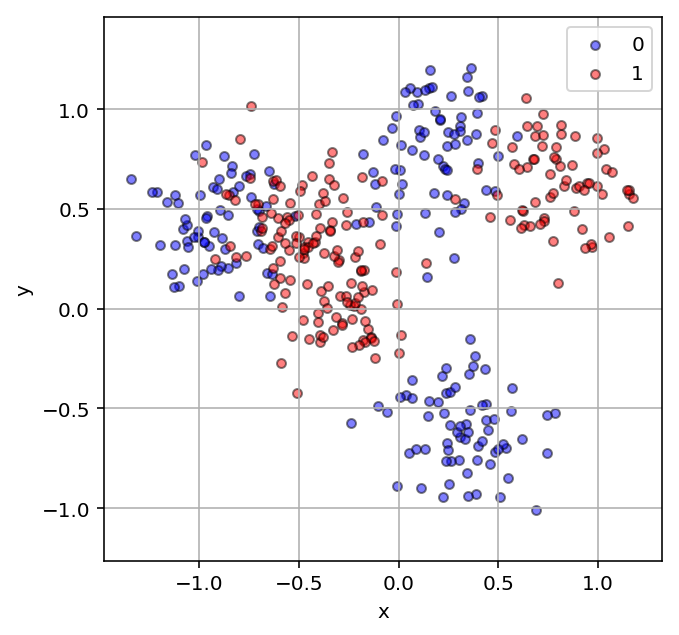

In [3]:
# generate 2d classification dataset
xy, labels = make_blobs(n_samples=400, center_box=(-1,1), centers=6,cluster_std=0.2, random_state=20)
labels = labels % 2
plot_scatter(xy, labels)

In [4]:
features = np.array([[xval, yval] for xval, yval in xy])
labels = labels.reshape(-1,1)

In [5]:
features_train, features_test, labels_train, labels_test  = train_test_split(features, labels, test_size = 0.3)

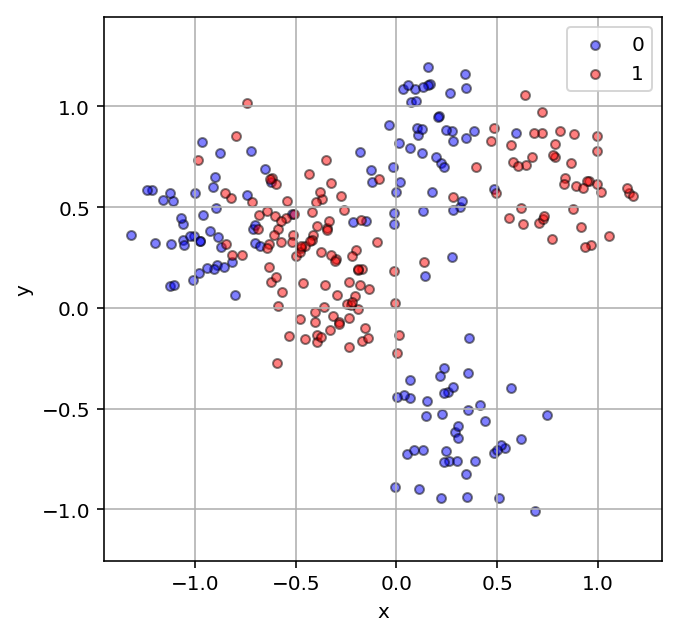

In [6]:
plot_scatter(features_train, labels_train.flatten())

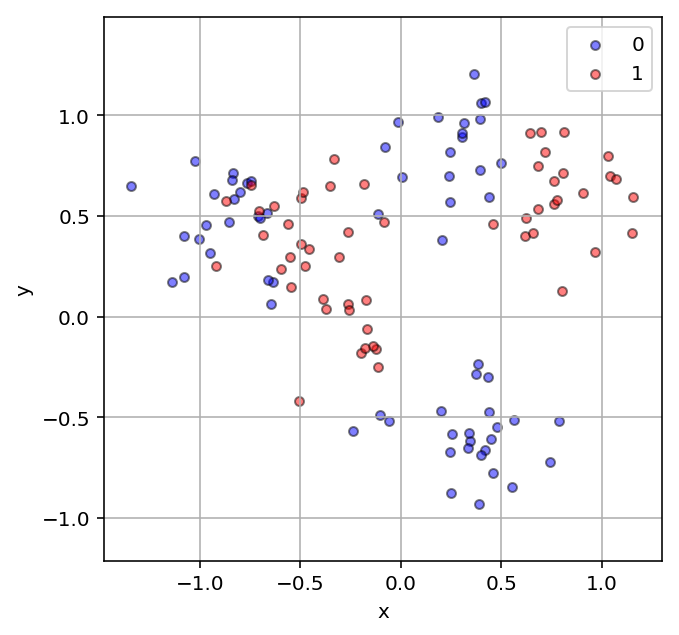

In [7]:
plot_scatter(features_test, labels_test.flatten())

In [8]:
def plot_model(sess, model, titles):
    train_and_test = [(features_train, labels_train), (features_test, labels_test)]
    xx, yy = np.meshgrid(np.linspace(-1.5,1.5), np.linspace(-1.5,1.5))
    prediction = sess.run(model, feed_dict={x: np.array([[xxval, yyval] for xxval, yyval in zip(xx.flatten(), yy.flatten())])})
    Z = prediction.reshape(xx.shape)
    colors = {1:'red', 0:'blue'}
    _, axes = plt.subplots(1, 2, figsize=(8, 4))
    for (xy_, labels_), ax, title in zip(train_and_test, axes, titles):
        df = DataFrame(dict(x=xy_[:,0], y=xy_[:,1], label=labels_.flatten()))
        ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=.9,)
        grouped = df.groupby('label')
        for key, group in grouped:
            group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key], edgecolor='k')
        ax.set_xlim([-1.3, 1.3])
        ax.set_ylim([-1.3, 1.3])
        ax.grid(linestyle='--')
        ax.set_title(title)
    plt.show()

## Problem 1

In [9]:
# TODO 1 Hyper-Parameters
num_hidden1 = 10
num_hidden2 = 4
learning_rate = 1E-2
MaxEpoch = 1500

# Model
tf.set_random_seed(180417)
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

hidden1 = tf.layers.dense(x, units=num_hidden1, use_bias=True, activation=tf.nn.sigmoid)
hidden2 = tf.layers.dense(hidden1, units=num_hidden2, use_bias=True, activation=tf.nn.sigmoid)
yhat = tf.layers.dense(hidden2, units=1, use_bias=True, activation=tf.nn.sigmoid)

loss = tf.reduce_mean(-y * tf.log(yhat) - (1 - y) * tf.log(1 - yhat))

train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
losses1 = []
for epoch in range(MaxEpoch):
    sess.run(train, feed_dict={x:features_train, y:labels_train})
    train_loss = sess.run(loss, feed_dict={x:features_train, y:labels_train})
    test_loss = sess.run(loss, feed_dict={x:features_test, y:labels_test})
    losses1.append([train_loss, test_loss])
    if epoch % 200 == 0:
        print(epoch, train_loss, test_loss)
        
losses1 = np.array(losses1)

0 0.71336704 0.69127715
200 0.59154737 0.57825357
400 0.5737228 0.55639726
600 0.5715063 0.5533877
800 0.57060593 0.55240417
1000 0.5700929 0.5520042
1200 0.56975466 0.55182713
1400 0.5695158 0.5517507


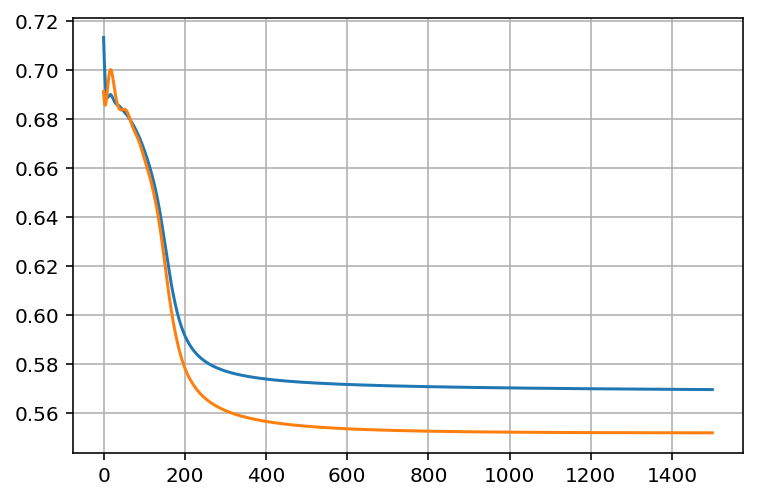

In [10]:
plt.plot(losses1[:, 0], label='train')
plt.plot(losses1[:, 1], label='test')
plt.grid()
plt.show()

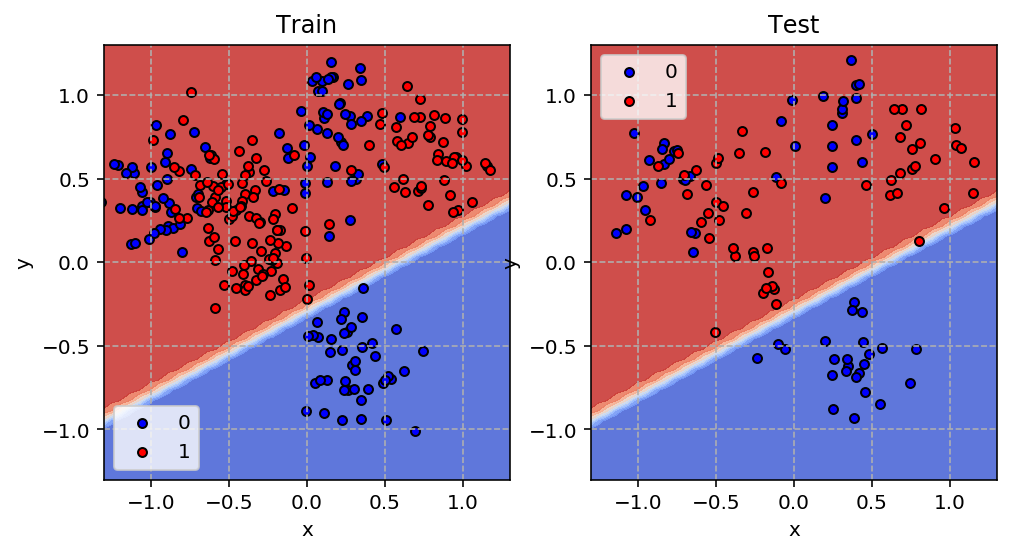

In [11]:
plot_model(sess, yhat, ["Train", "Test"])

## Problem 2

In [12]:
# TODO 2 Hyper-Parameters
num_hidden1 = 10
num_hidden2 = 4
learning_rate = 1E-2
MaxEpoch = 4500

# Model
tf.set_random_seed(180417)
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

hidden1 = tf.layers.dense(x, units=num_hidden1, use_bias=True, activation=tf.nn.sigmoid)
hidden2 = tf.layers.dense(hidden1, units=num_hidden2, use_bias=True, activation=tf.nn.sigmoid)
yhat = tf.layers.dense(hidden2, units=1, use_bias=True, activation=tf.nn.sigmoid)

loss = tf.reduce_mean(-y * tf.log(yhat) - (1 - y) * tf.log(1 - yhat))

train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

losses2 = []
for epoch in range(MaxEpoch):
    sess.run(train, feed_dict={x:features_train, y:labels_train})
    train_loss = sess.run(loss, feed_dict={x:features_train, y:labels_train})
    test_loss = sess.run(loss, feed_dict={x:features_test, y:labels_test})
    losses2.append([train_loss, test_loss])
    if epoch % 200 == 0:    
        print(epoch, train_loss, test_loss)
losses2 = np.array(losses2)

0 0.7061832 0.69085747
200 0.54542327 0.5313059
400 0.41904685 0.410299
600 0.41057697 0.39748177
800 0.21724543 0.25931102
1000 0.19943555 0.24509485
1200 0.19232982 0.24429668
1400 0.18746425 0.2497847
1600 0.18449359 0.25301266
1800 0.18157342 0.25869358
2000 0.17422403 0.26512855
2200 0.16202874 0.29482183
2400 0.15335758 0.31076947
2600 0.14668122 0.3207733
2800 0.1418314 0.32749227
3000 0.13836773 0.33210236
3200 0.13583846 0.33526117
3400 0.13392043 0.3380542
3600 0.13240823 0.3418142
3800 0.13113931 0.34716657
4000 0.13003123 0.354341
4200 0.12902461 0.364071
4400 0.12809445 0.37680447


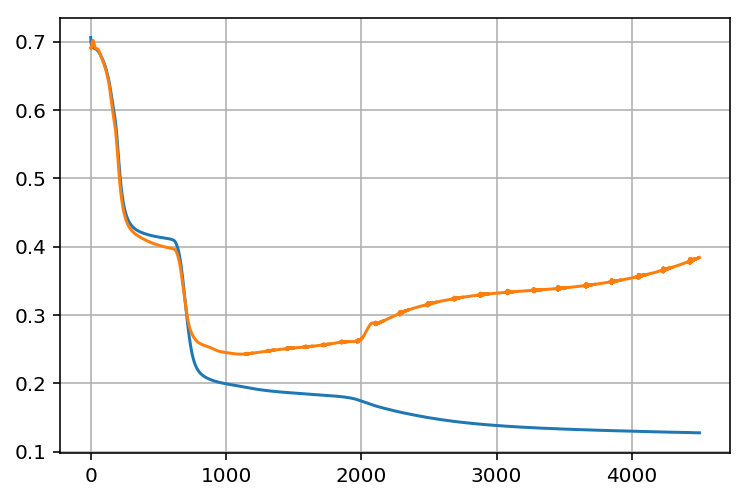

In [13]:
plt.plot(losses2[:, 0], label='train')
plt.plot(losses2[:, 1], label='test')
plt.grid()
plt.show()

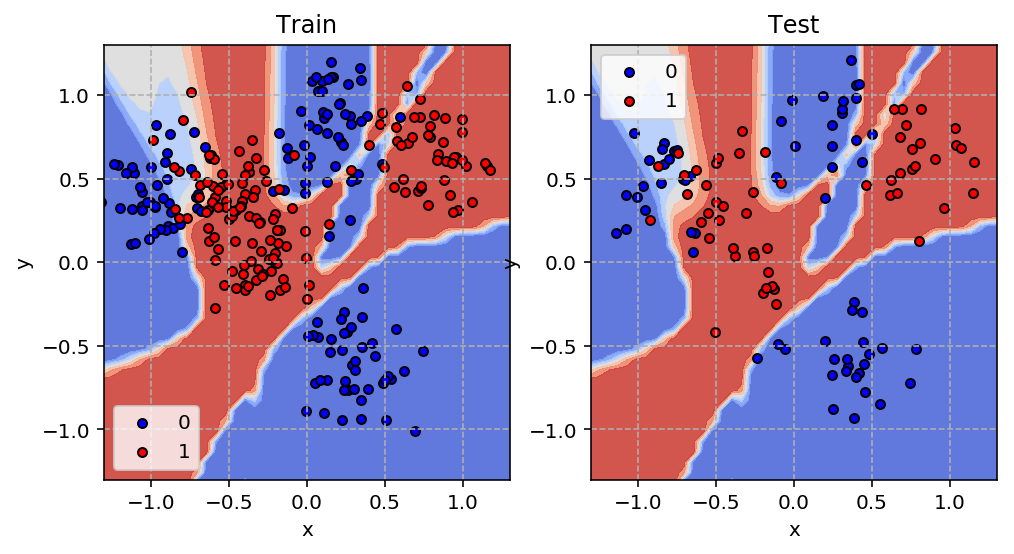

In [14]:
plot_model(sess, yhat, ["Train", "Test"])